In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


## Analysis of the histograms in the output from the ReconComparisonEvWClusterSum module

---

In [2]:
# 60h
inFile = "./data/60h/results_EvW_Crowded_60h_Final.root"
dataset="60h"

In [3]:
f = r.TFile(inFile)
#f = r.TFile("./data/60h/evw_run1Final_60h_CrowdedClusters.root")
f.cd("farline")
f.ls()
print([ x for x in f.Get("farline").GetListOfKeys()])

outpath="./images/"+dataset+"/crowded/"

[<ROOT.TKey object ("evwEnergyEvW") at 0x7ffff785d750>, <ROOT.TKey object ("counterHist") at 0x7ffff785d970>, <ROOT.TKey object ("counterHistHighEnergy") at 0x7ffff785bae0>, <ROOT.TKey object ("evwDeltaXDeltaY") at 0x7ffff785bd70>, <ROOT.TKey object ("evwDeltaTCalo") at 0x7ffff7861250>, <ROOT.TKey object ("evwDeltaE") at 0x7ffff7861470>, <ROOT.TKey object ("evwDeltaEAll") at 0x7ffff7861690>, <ROOT.TKey object ("counterWestVsTime") at 0x7ffff78618b0>, <ROOT.TKey object ("counterEastVsTime") at 0x7ffff785ef60>, <ROOT.TKey object ("counterEastVsCounterWestVsTime") at 0x7ffff785f1b0>, <ROOT.TKey object ("evwEnergyEast_vs_EnergyWest_CaloNum") at 0x7ffff785f450>]
TFile**		./data/60h/results_EvW_Crowded_60h_Final.root	
 TFile*		./data/60h/results_EvW_Crowded_60h_Final.root	
  TDirectoryFile*		farline	farline (ReconComparisonEvWClusterSum) folder
   KEY: TH2I	evwEnergyEvW;1	EnergyEast vs. EnergyWest
   KEY: TH2I	counterHist;1	Number of Clusters Per Island in East and West
   KEY: TH2I	counterH

### Lets first look at the energies of the islands in both recon east and recon west

---

In [4]:
evwEnergyEvW = f.Get("farline/evwEnergyEvW").Clone("evwEnergyEvW")
#evwEnergyEvW.Rebin2D(5,5)


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  1.87012e+11
NDf                       =       107638
Edm                       =    3.259e-09
NCalls                    =           35
p0                        =            0                      	 (fixed)
p1                        =     0.998538   +/-   0.00016058  


Info in <TCanvas::SaveAs>: ROOT file ./images/60h/crowded/ding.root has been created


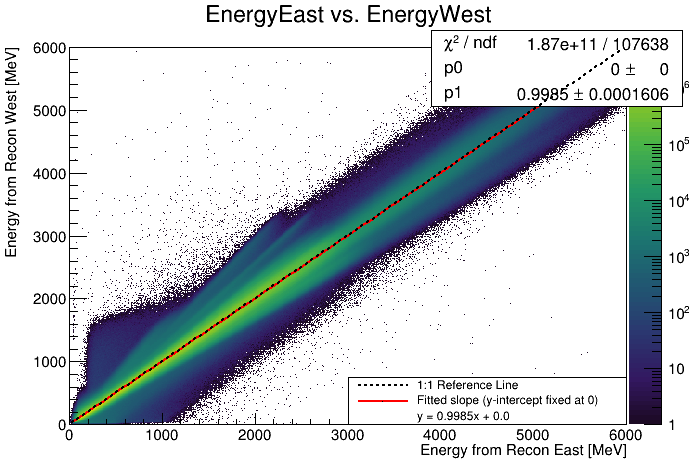

In [5]:
c = r.TCanvas()
evwEnergyEvW.Draw("colz")
c.SetLogz()
c.Draw()

onetoone = r.TF1("onetoone","pol1",0,6000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(2)
onetoone.SetLineColor(1)
onetoone.Draw("SAME")

actualslope = r.TF1("actualslope","pol1",0,6000)
actualslope.FixParameter(0,0)
evwEnergyEvW.Fit("actualslope","REMB")

leg = r.TLegend(0.5,0.1,0.9,0.2)
leg.AddEntry(onetoone ,"1:1 Reference Line", "l")
leg.AddEntry(actualslope ,"Fitted slope (y-intercept fixed at 0)", "pl")
leg.AddEntry(actualslope ,"y = "+str("%.4f" % round(actualslope.GetParameter(1),4))+"x + "+str(actualslope.GetParameter(0)), "")
leg.Draw()

c.Print(outpath+"ding.root")

In [6]:
evwEnergyEast_vs_EnergyWest_CaloNum = f.Get("farline/evwEnergyEast_vs_EnergyWest_CaloNum")

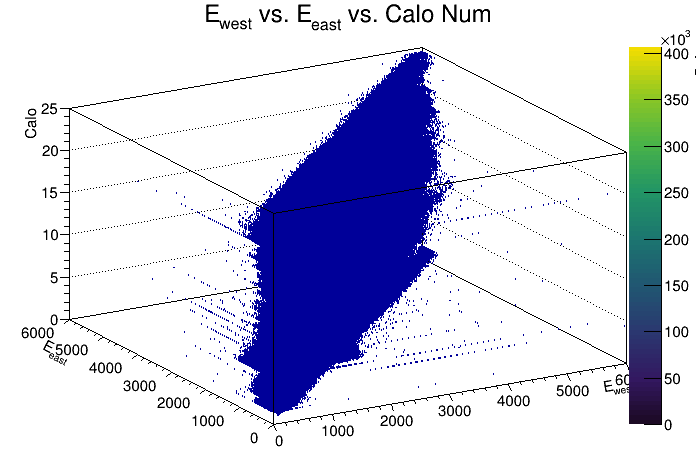

In [7]:
c = r.TCanvas()
evwEnergyEast_vs_EnergyWest_CaloNum.Draw("lego2z")
c.Draw()

Info in <TCanvas::Print>: png file ./images/60h/crowded/Energy_EvW_Crowded_ByCalo.png has been created


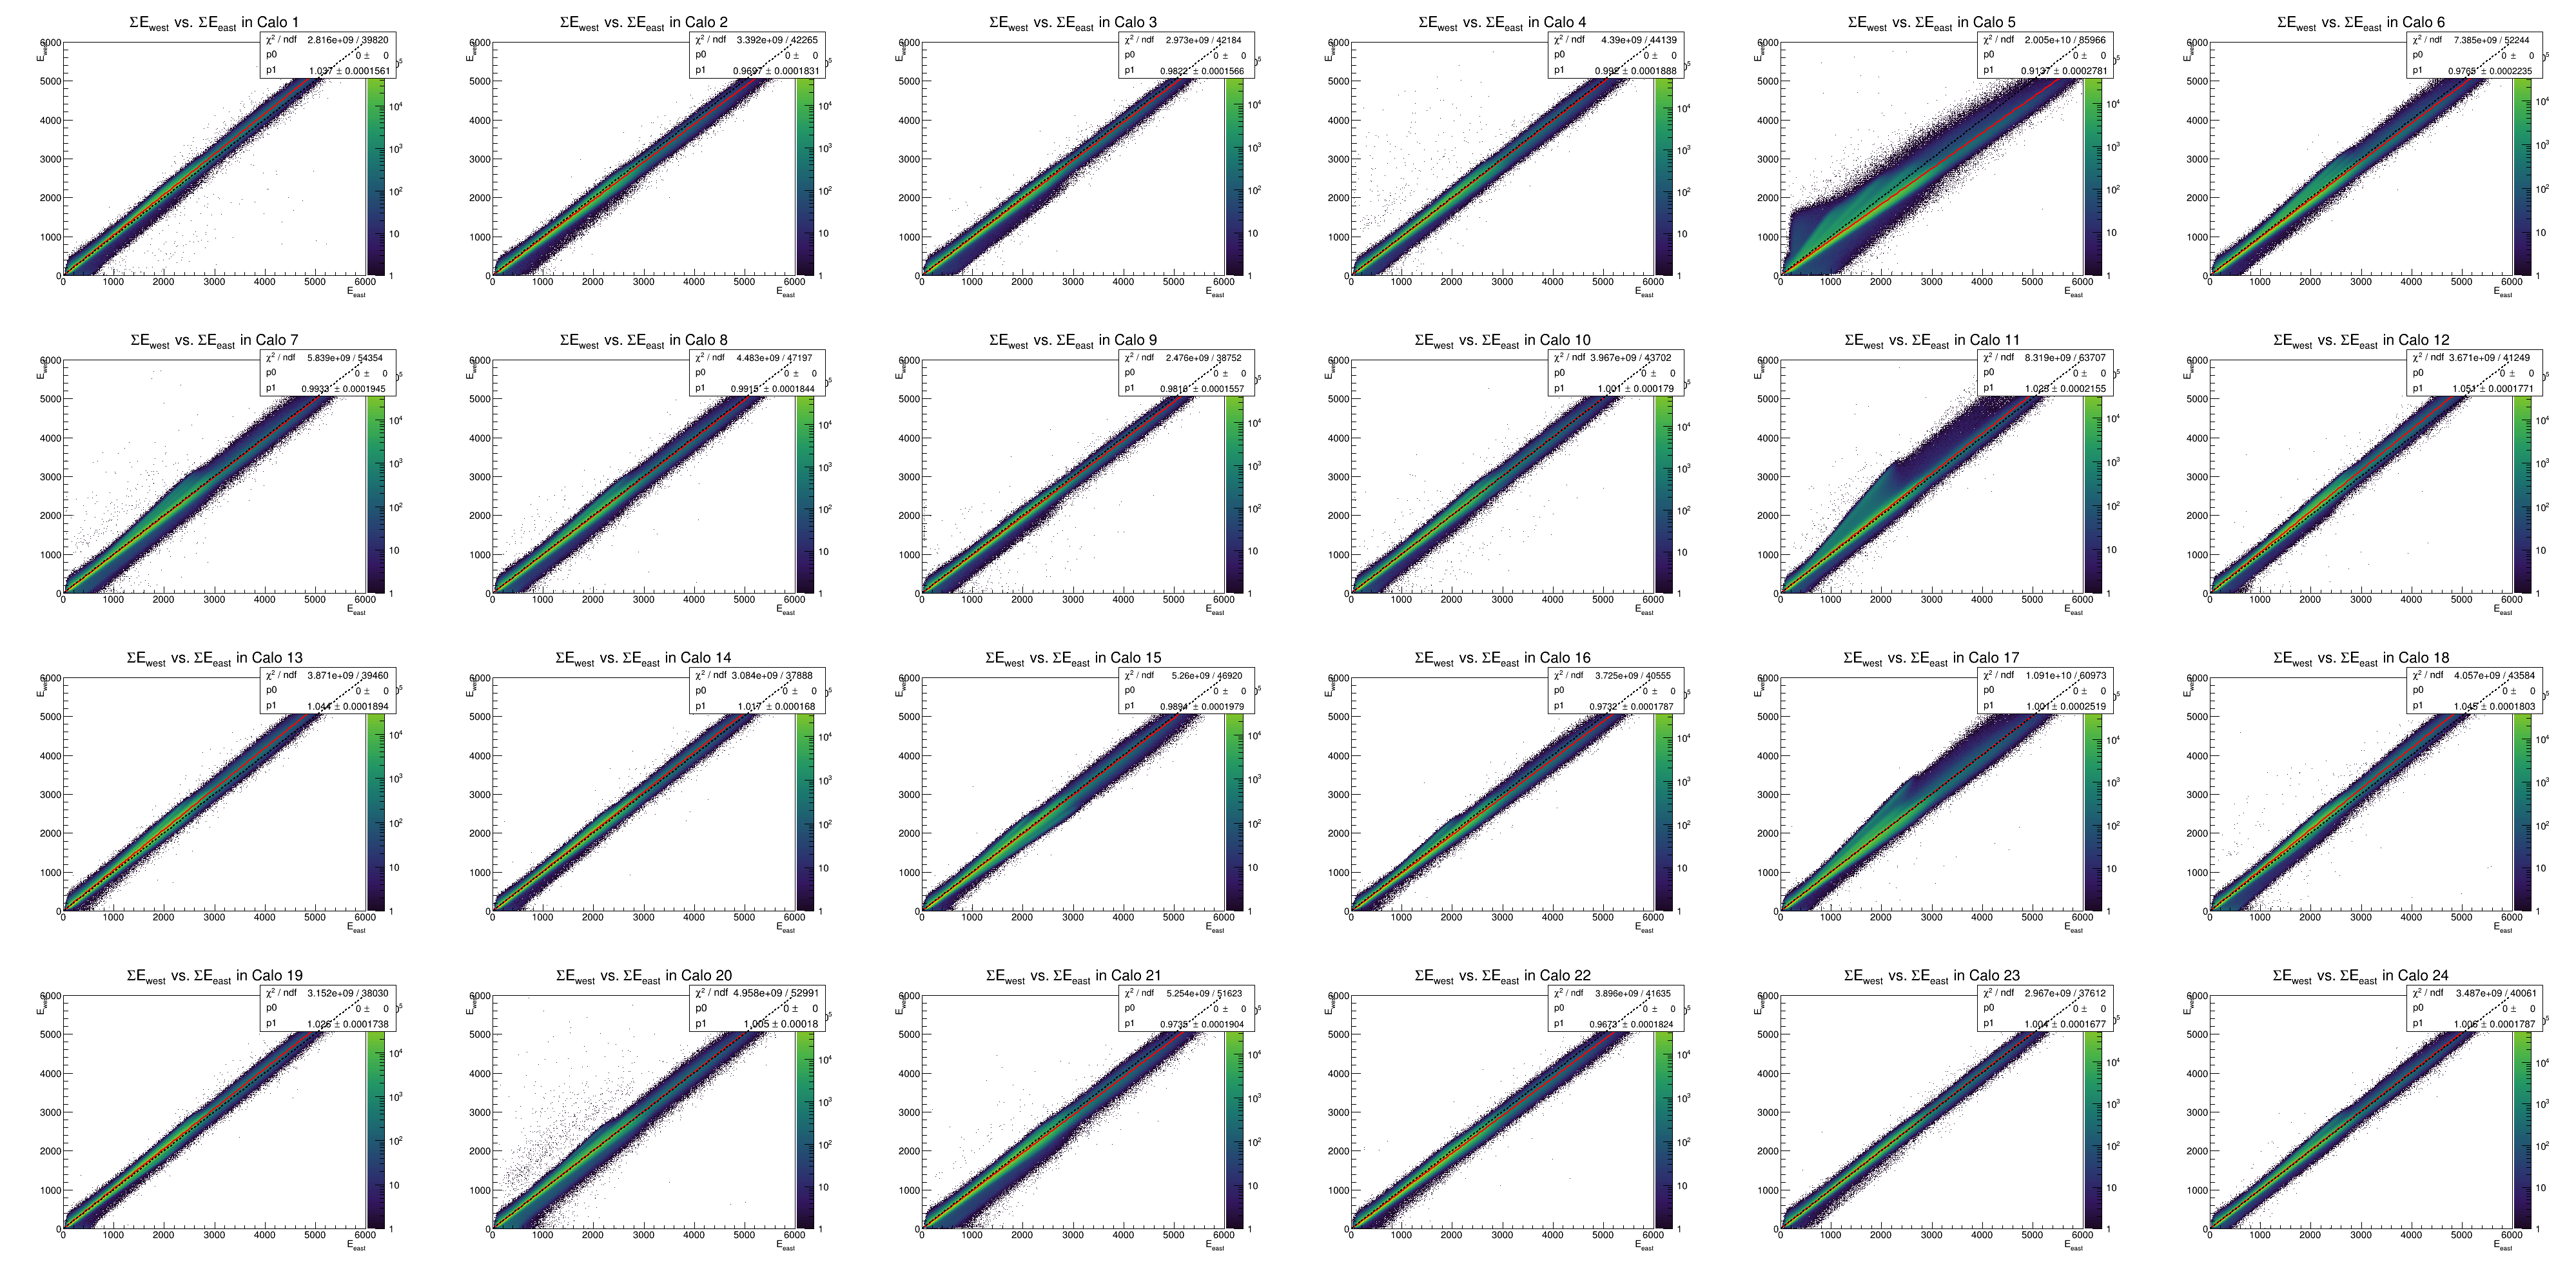

In [8]:
slopes = []
slopeErrs = []

c = r.TCanvas("c","c",4000,2000)
c.Divide(6,4)
for calo in range(1,25):
    c.cd(calo)
    evwEnergyEast_vs_EnergyWest_CaloNum.GetZaxis().SetRange(calo+1,calo+1)
    hi = evwEnergyEast_vs_EnergyWest_CaloNum.Project3D("xy")
    hi.Fit(actualslope,"REMBQ")
    slopes.append(actualslope.GetParameter(1))
    slopeErrs.append(actualslope.GetParError(1))
    hi.SetTitle("#SigmaE_{west} vs. #SigmaE_{east} in Calo "+str(calo))
    hi.DrawCopy("colz")
    onetoone.Draw("SAME")
    r.gPad.SetLogz()
c.Draw()
c.Print(outpath+"Energy_EvW_Crowded_ByCalo.png")

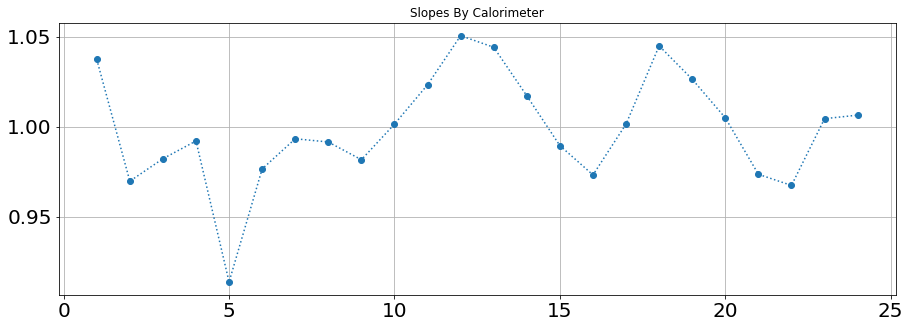

In [9]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar([i for i in range(1,25)], slopes, yerr=slopeErrs, fmt="o:")
plt.grid()
plt.title("Slopes By Calorimeter")
plt.show()

[1.0380528297864404, 0.9702589140012071, 0.983093962582777, 0.992675609287268, 0.9143163724924623, 0.9774356892226146, 0.9942414426982512, 0.9922626117829465, 0.9825149322864077, 1.0023972794052287, 1.0239086232459007, 1.0518085294830193, 1.045383856262883, 1.018417761772986, 0.9905068718153016, 0.9744183980621538, 1.0021883891506196, 1.0460879265462317, 1.027879375549269, 1.0063675910046348, 0.9743817594343844, 0.9684791909885003, 1.0048546452127787, 1.0067658525631944]


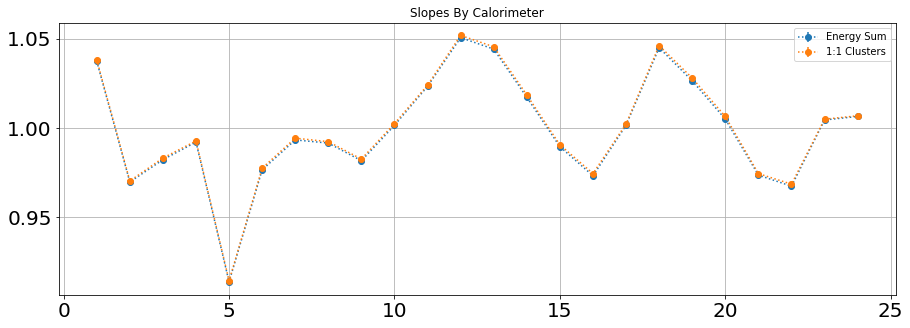

In [10]:
with open("images/"+dataset+"/onetoone/slopes_by_calo.txt") as slopefile:
    line = slopefile.readlines()
originalslopes = line[0][1:-1].split(",")
originalslopes = [float(x) for x in originalslopes]
print(originalslopes)


fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar([i for i in range(1,25)], slopes, yerr=slopeErrs, fmt="o:",label="Energy Sum")
plt.errorbar([i for i in range(1,25)], originalslopes, yerr=0, fmt="o:",label="1:1 Clusters")
plt.grid()
plt.legend()
plt.title("Slopes By Calorimeter")
plt.show()

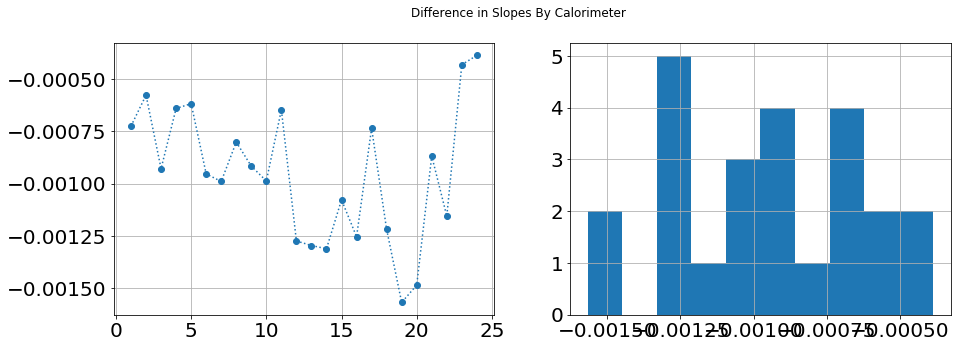

In [11]:
with open("images/"+dataset+"/onetoone/slopes_by_calo.txt") as slopefile:
    line = slopefile.readlines()
diffslopes = [x-y for (x,y) in zip(slopes, originalslopes)]

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].errorbar([i for i in range(1,25)], diffslopes, yerr=0, fmt="o:",label="Difference in Slopes")
ax[1].hist(diffslopes)
ax[0].grid()
ax[1].grid()
plt.suptitle("Difference in Slopes By Calorimeter")
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


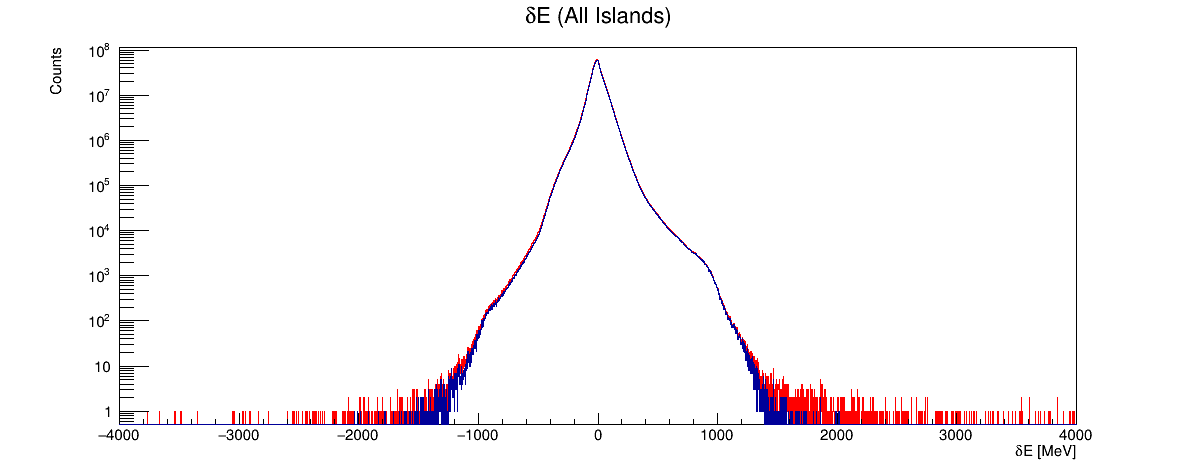

In [12]:
evwDeltaE = f.Get("farline/evwDeltaE")
evwDeltaEAll = f.Get("farline/evwDeltaEAll")
evwDeltaEAll.SetLineColor(2)

c = r.TCanvas("c","c",1200,500)
evwDeltaEAll.Draw("")
evwDeltaE.Draw("same")
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/60h/crowded/DeltaE_AllIslands.png has been created


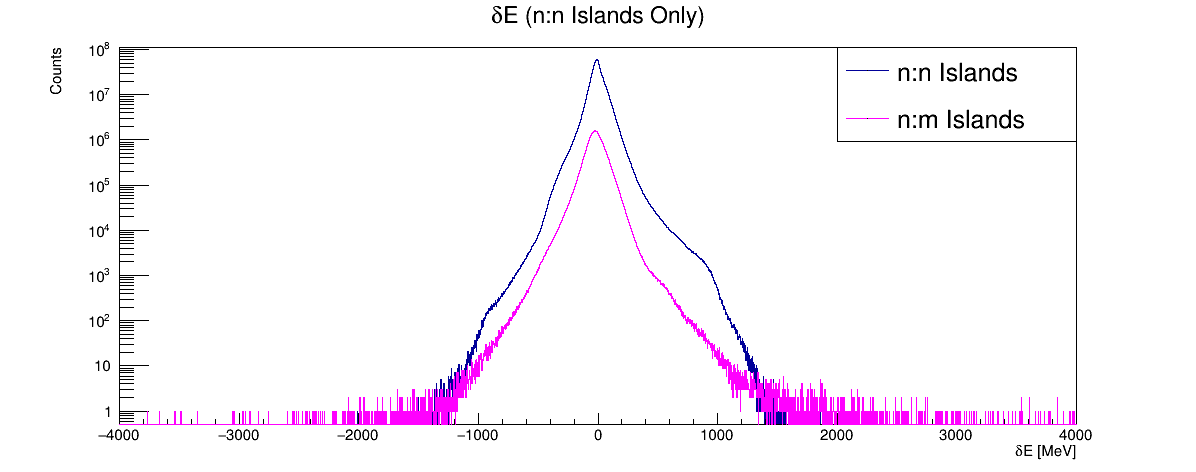

In [13]:
evwDeltaEDiff = evwDeltaEAll.Clone("evwDeltaEDiff")
evwDeltaEDiff.Add(evwDeltaE,-1)
evwDeltaEDiff.SetTitle("#deltaE (All n:m Islands)")
evwDeltaEDiff.SetLineColor(6)

c = r.TCanvas("c","c",1200,500)
evwDeltaE.Draw()
evwDeltaEDiff.Draw("same")
c.SetLogy()

leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(evwDeltaE,"n:n Islands")
leg.AddEntry(evwDeltaEDiff,"n:m Islands")
leg.Draw()

c.Draw()
c.Print(outpath+"DeltaE_AllIslands.png")

---

### And now the number of clusters per island in each reconstruction

In [14]:
counterEastVsCounterWestVsTime = f.Get("farline/counterEastVsCounterWestVsTime")

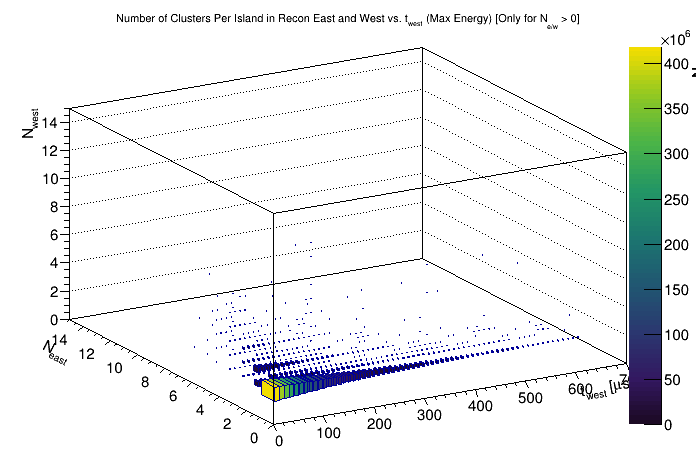

In [15]:
c = r.TCanvas()
counterEastVsCounterWestVsTime.Draw("lego2z")
c.Draw()

Info in <TCanvas::Print>: png file ./images/60h/crowded/NumberOfClusters.png has been created


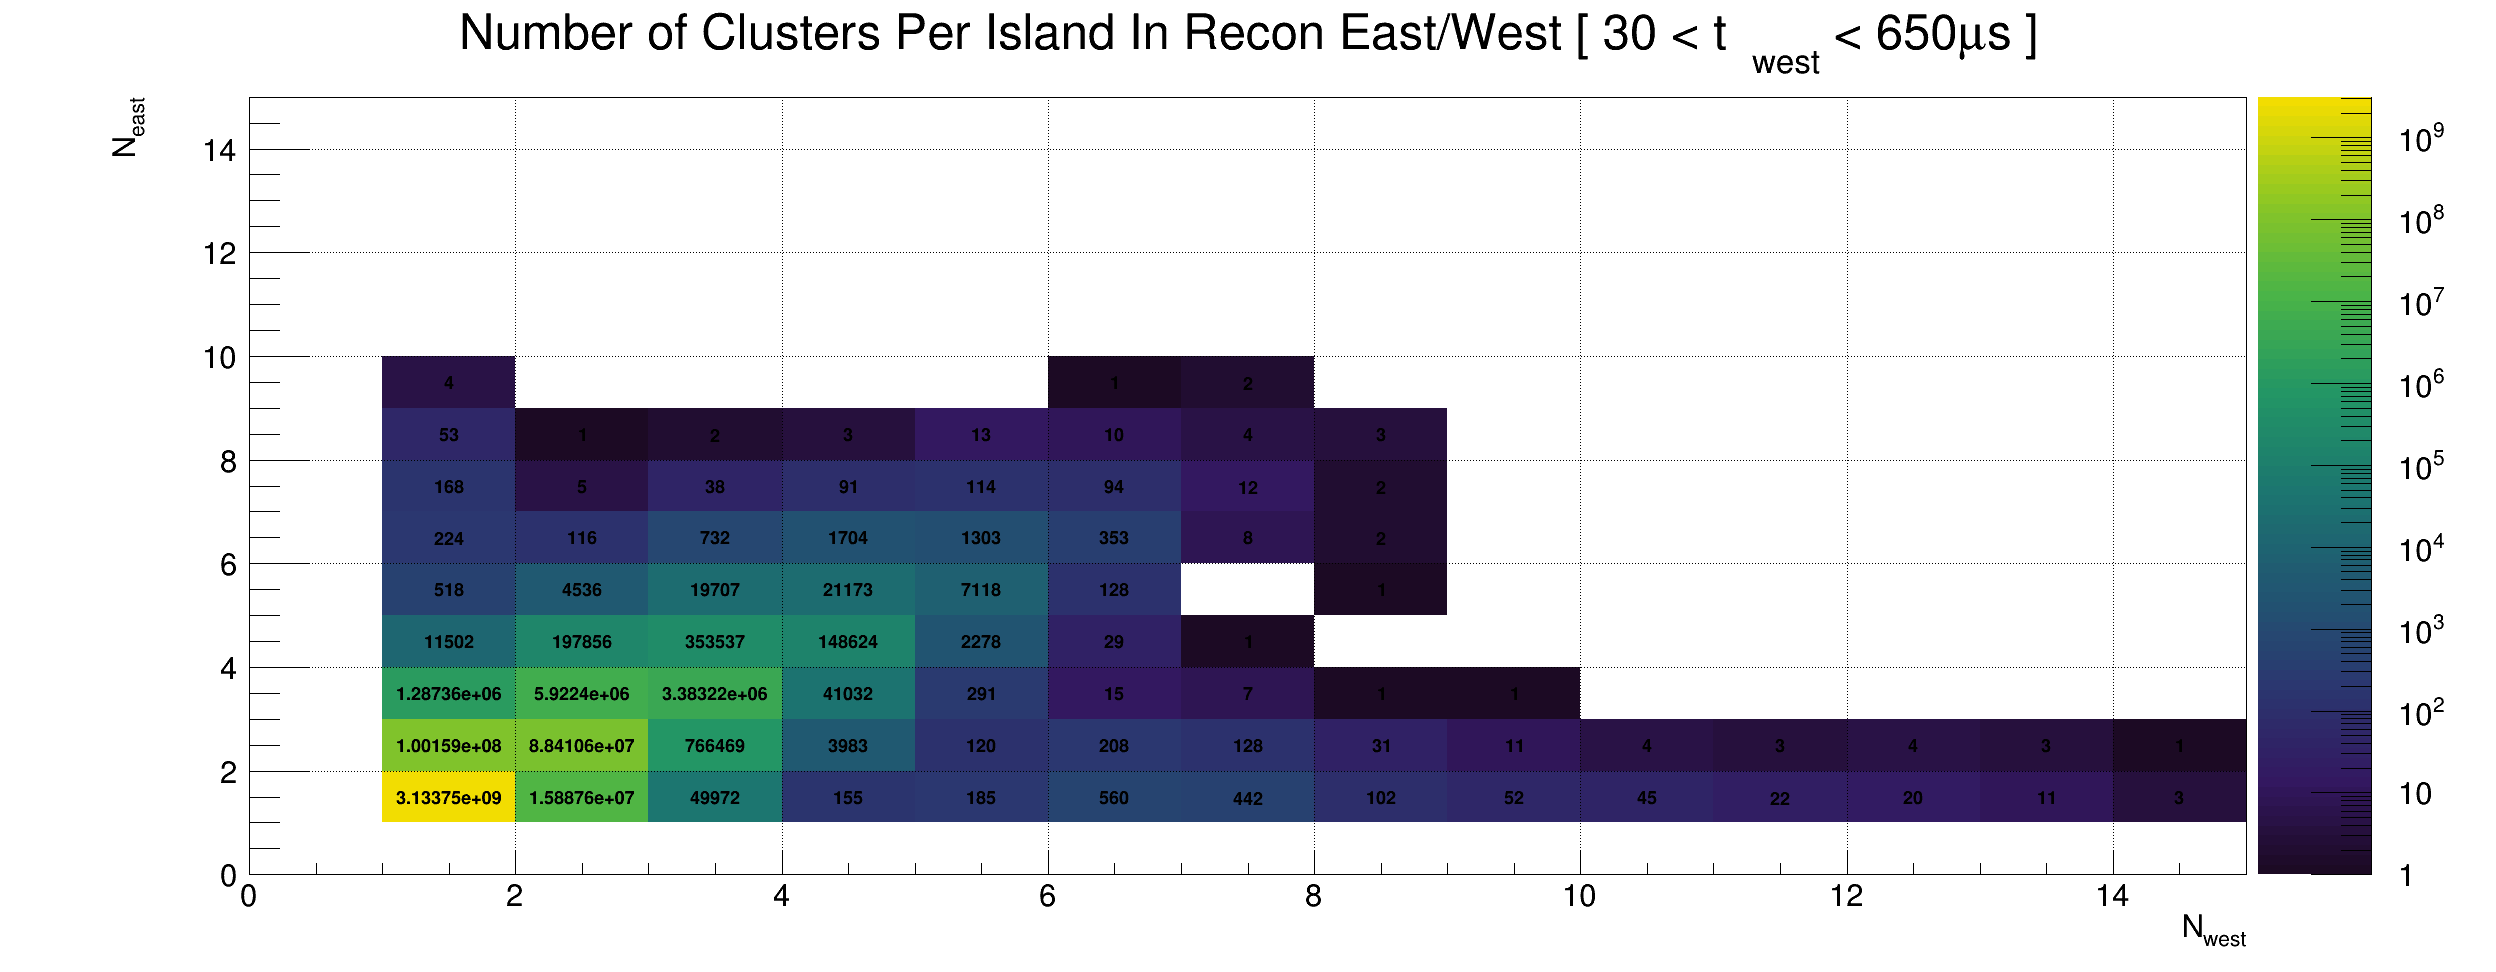

In [16]:
c = r.TCanvas("c","c",2500,1000)

t1 = 30
t2 = 650

counterEastVsCounterWestVsTime.GetXaxis().SetRangeUser(t1,t2)
counterEastVsCounterWest = counterEastVsCounterWestVsTime.Project3D("yz").Clone("counterEastVsCounterWest")
counterEastVsCounterWest.Draw("colz text")
counterEastVsCounterWest.SetTitle("Number of Clusters Per Island In Recon East/West [ "+str(t1)+" < t_{west} < "+str(t2)+"#mus ]")

#counterEastVsCounterWest.Fit(actualslope)

c.SetLogz()
c.SetGrid()
c.Draw()
c.Print(outpath+"NumberOfClusters.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/60h/crowded/NumberOfClusters_Scaled.png has been created


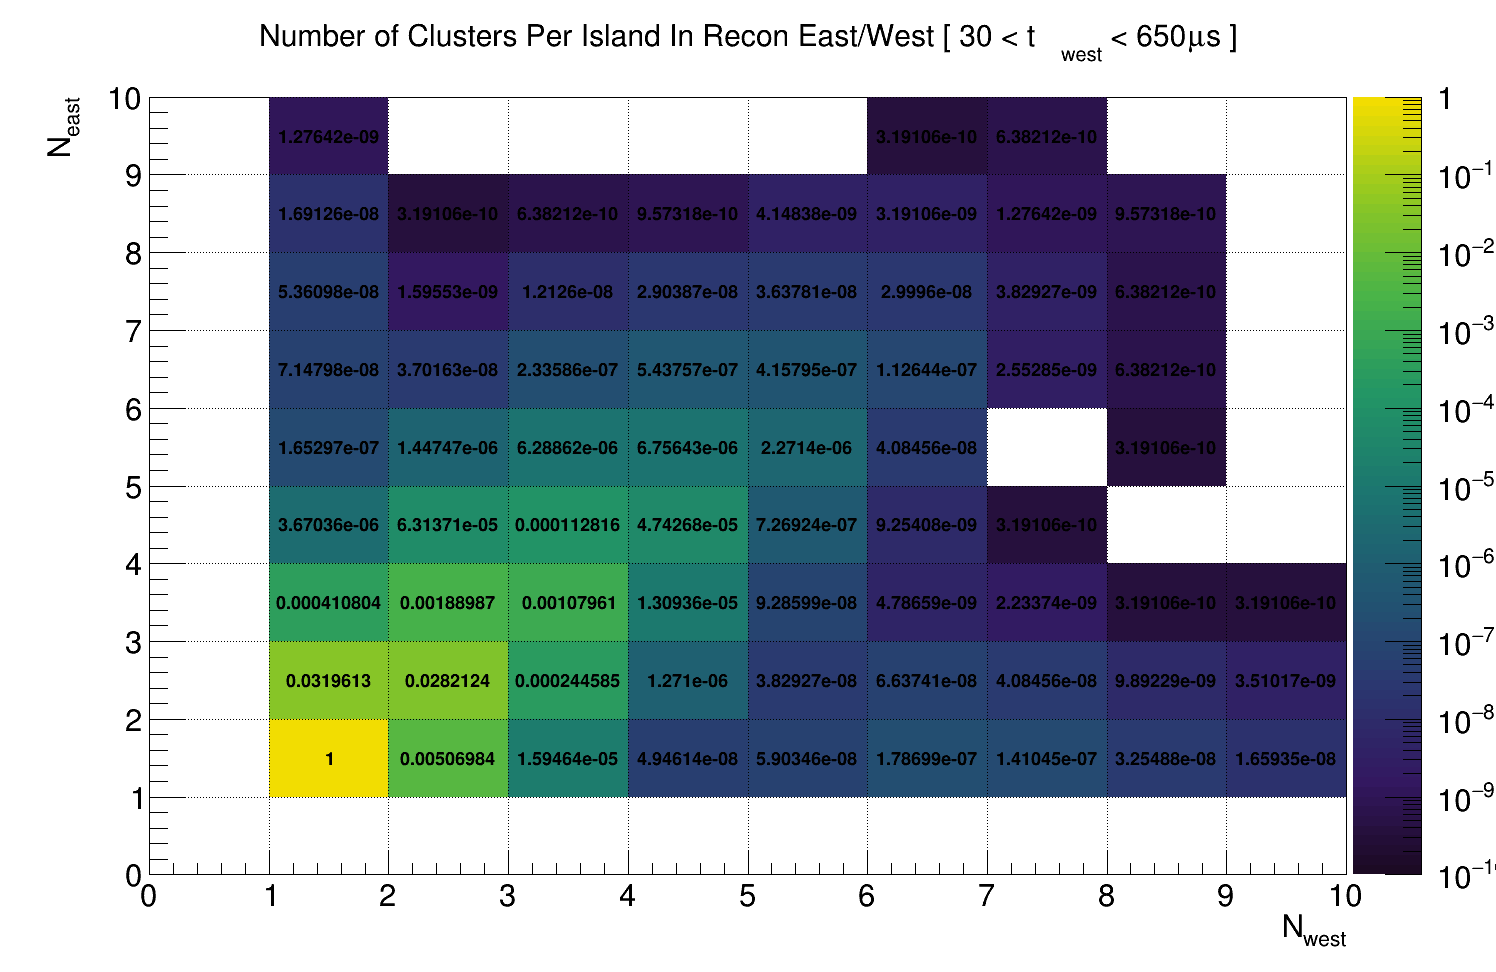

In [17]:
c = r.TCanvas("c","c",1500,1000)

counterEastVsCounterWest_Scaled = counterEastVsCounterWest.Clone("counterEastVsCounterWest_Scaled")
counterEastVsCounterWest_Scaled.Scale(1/(counterEastVsCounterWest_Scaled.GetBinContent(2,2)))
counterEastVsCounterWest_Scaled.Draw("colz text")

counterEastVsCounterWest_Scaled.GetXaxis().SetRangeUser(0,10)
counterEastVsCounterWest_Scaled.GetYaxis().SetRangeUser(0,10)
counterEastVsCounterWest_Scaled.GetZaxis().SetRangeUser(10**-10,1)

c.SetLogz()
c.SetGrid()
c.Draw()
c.Print(outpath+"NumberOfClusters_Scaled.png")